In [41]:
from CGS import solve_cgs;
from CGN import solve_cgn;
from scipy.sparse.linalg import qmr;
import matrixgenerators
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# To be ran 
import importlib
import CGS
import CGN
import matrixgenerators

importlib.reload(CGS)
importlib.reload(CGN)
importlib.reload(matrixgenerators)

from CGS import solve_cgs
from CGN import solve_cgn


First experiment: Calculating how residual error + time taken to run change with matrix size with a fixed condition number.

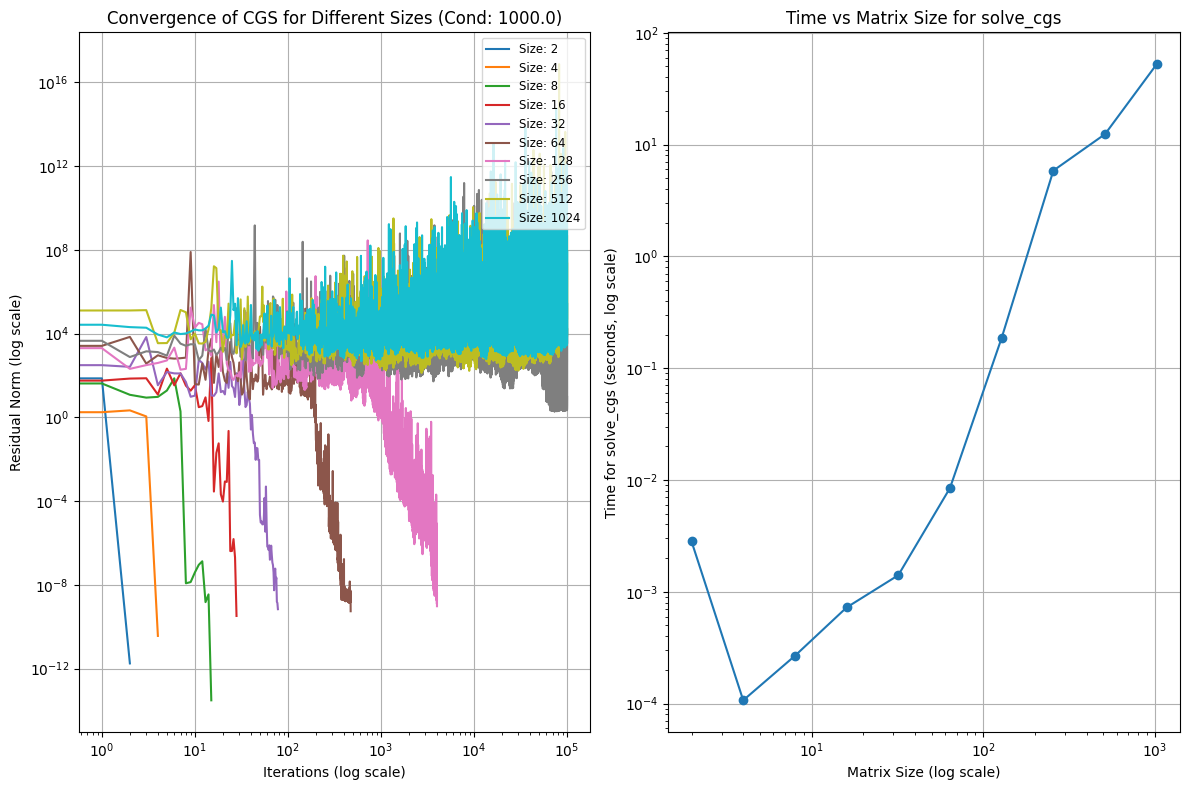

In [ ]:
import time
import matplotlib.pyplot as plt

fixed_kappa = 1e3  
sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024] # change as necessary

# store residuals and times
results_size = {}
timings_size = {}

for dim in sizes:
    b = np.random.rand(dim)  
    A = matrixgenerators.cond_num_matrix(dim, fixed_kappa)
    
    start_time = time.time()
    _, residuals, _ = solve_cgs(A, b)  
    end_time = time.time()
    
    results_size[dim] = residuals
    timings_size[dim] = end_time - start_time  # total time taken

plt.figure(figsize=(12, 8))

# residuals v iterations
plt.subplot(1, 2, 1)
for dim, residuals in results_size.items():
    plt.plot(residuals, label=f"Size: {dim}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGS for Different Sizes (Cond: {fixed_kappa})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# time vs matrix size
plt.subplot(1, 2, 2)
plt.plot(timings_size.keys(), timings_size.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Matrix Size (log scale)")
plt.ylabel("Time for solve_cgs (seconds, log scale)")
plt.title("Time vs Matrix Size for solve_cgs")
plt.grid()

plt.tight_layout()
plt.show()


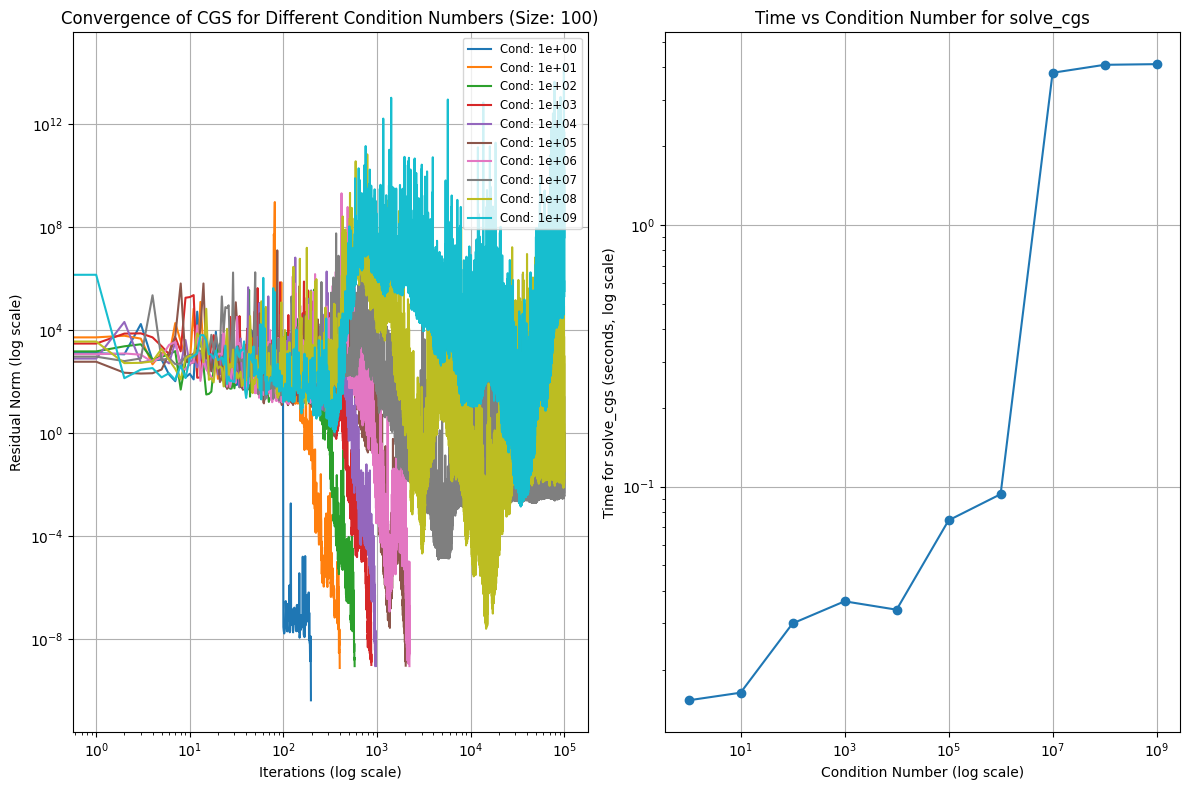

In [ ]:
import time
import matplotlib.pyplot as plt

# Fixed matrix size
fixed_size = 100 # change — 124 was unstable
condition_numbers = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]  # change if unstable

# Store residuals and timing results
results_condition = {}
timings_condition = {}

for kappa in condition_numbers:
    b = np.random.rand(fixed_size)  # for random b.
    A = (matrixgenerators.cond_num_matrix(fixed_size, kappa)) * 10 # scaled to avoid too small entries
    
    start_time = time.time()
    _, residuals, _ = solve_cgs(A, b)  
    end_time = time.time()
    
    results_condition[kappa] = residuals
    timings_condition[kappa] = end_time - start_time  # time for cgs call 

plt.figure(figsize=(12, 8))

# residuals vs iteration
plt.subplot(1, 2, 1)
for kappa, residuals in results_condition.items():
    plt.plot(residuals, label=f"Cond: {kappa:.0e}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGS for Different Condition Numbers (Size: {fixed_size})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# timing vs condition number
plt.subplot(1, 2, 2)
plt.plot(timings_condition.keys(), timings_condition.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Condition Number (log scale)")
plt.ylabel("Time for solve_cgs (seconds, log scale)")
plt.title("Time vs Condition Number for solve_cgs")
plt.grid()

plt.tight_layout()
plt.show()


Now we are going to examine how sparsity impacts convergence, fixing size but not condition number (cause sparsity will change condition number anyway and random matrices should not have too variable CN).

In [ ]:
# Experiment parameters
fixed_size = 100  # Fixed matrix size
fixed_kappa = 1e3  # Fixed condition number
sparsity_levels = [0, 0.1, 0.3, 0.5, 0.7, 0.9]  # Sparsity percentages (0 = dense, 0.9 = very sparse)

# Store results
results_sparsity = {}
timings_sparsity = {}
condition_numbers = {}

for sparsity in sparsity_levels:
    # Generate matrix and make it sparse
    #dense_matrix = matrixgenerators.cond_num_matrix(fixed_size, fixed_kappa)
    dense_matrix = np.random.rand(50, 50)
    sparse_matrix = matrixgenerators.make_matrix_sparse(dense_matrix, sparsity)
    
    # Calculate and store the condition number of the sparse matrix
    cond_num = np.linalg.cond(sparse_matrix)
    condition_numbers[sparsity] = cond_num
    print(f"Sparsity: {sparsity}, Condition Number: {cond_num:.2e}")
    
    # Generate random b
    b = np.random.rand(fixed_size)
    
    # Time solve_cgs and track residuals
    start_time = time.time()
    _, residuals, _ = solve_cgs(sparse_matrix, b)
    end_time = time.time()
    
    results_sparsity[sparsity] = residuals
    timings_sparsity[sparsity] = end_time - start_time

# Plot results
plt.figure(figsize=(14, 8))

# Subplot 1: Residuals vs iterations for varying sparsity
plt.subplot(1, 2, 1)
for sparsity, residuals in results_sparsity.items():
    plt.plot(residuals, label=f"Sparsity: {sparsity:.1f}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGS for Varying Sparsity (Size: {fixed_size}, Cond: {fixed_kappa})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# Subplot 2: Time vs sparsity percentage
plt.subplot(1, 2, 2)
plt.plot(timings_sparsity.keys(), timings_sparsity.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sparsity Percentage")
plt.ylabel("Time for solve_cgs (seconds, log scale)")
plt.title("Time vs Sparsity Percentage for solve_cgs")
plt.grid()

plt.tight_layout()
plt.show()


Sparsity: 0, Condition Number: 1.38e+03
Sparsity: 0.1, Condition Number: 1.23e+03
Sparsity: 0.3, Condition Number: 1.85e+03
Sparsity: 0.5, Condition Number: 5.32e+02


KeyboardInterrupt: 